In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

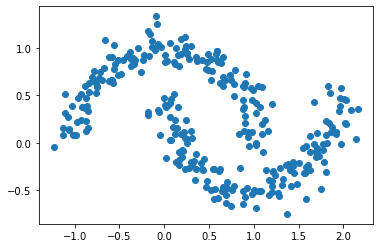

In [8]:
Xmoon, ymoon = make_moons(300, noise=.1, random_state=61)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

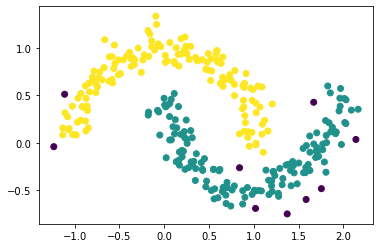

In [16]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=dbscan.labels_)

In [19]:
class Algo_DBSCAN:
    def __init__(self, radius, minpts, data):
        self.radius = radius
        self.minpts = minpts
        self.data = pd.DataFrame(data, columns=['x', 'y'])
        self.data['visited'] = 0
        self.data['cluster'] = -1

    def get_dist(self, a, b):
        return np.sqrt(((a - b)**2).sum(axis=0))

    def get_neighbor(self, row):
        distance = self.data[['x', 'y']].apply(lambda x: self.get_dist(x, row[['x', 'y']]), axis=1)
        return list(self.data[distance <= self.radius].index)

    def expand(self, row_ind, neighbors, cluster):
        self.data.loc[row_ind, 'cluster'] = cluster
        while len(neighbors) > 0:
            nb_ind = neighbors.pop()
            if self.data.loc[nb_ind, 'visited'] == 0:
                self.data.loc[nb_ind, 'visited'] = 1
                nb_neighbors = self.get_neighbor(self.data.loc[nb_ind, :])
                if len(nb_neighbors) >= self.minpts:
                    neighbors = neighbors + nb_neighbors
            if self.data.loc[nb_ind, 'cluster'] == -1:
                self.data.loc[nb_ind, 'cluster'] = cluster

    def fit(self):
        cluster = 0
        while (self.data['visited'] == 0).sum() > 0:
            row_ind = self.data[self.data['visited'] == 0].index[0]
            self.data.loc[row_ind, 'visited'] = 1
            neighbors = self.get_neighbor(self.data.loc[row_ind, :])
            if len(neighbors) < self.minpts:
                continue
            else:
                cluster += 1
                self.expand(row_ind, neighbors, cluster)
        self.labels = self.data['cluster']

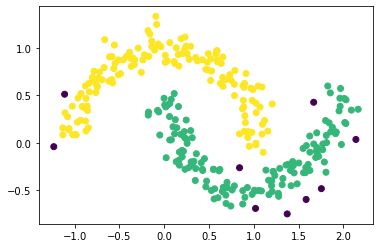

In [20]:
x = Algo_DBSCAN(0.15, 3, Xmoon)
x.fit()
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=x.labels)